# Problem Statment

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. **From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India.** It becomes really difficult to find the best place with all the amenities such as **high-speed internet, a comfortable stay as well as within the budget.** To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. **Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.**

In this competition, one has to use the knowledge of machine learning, deep learning, and **model building to predict the price per person for your next workstation trip.** The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import re

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
train = pd.read_csv('Train.csv')

In [4]:
test = pd.read_csv('Test.csv')

In [5]:
# Let's Preview the dataset

train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [6]:
# Combine train and test

combined = pd.concat([train,test],ignore_index=True)

train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [7]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0


In [8]:
len(combined['Places Covered'][0].split('|'))

4

In [9]:
combined['Places Covered'][3].replace(" and ","|")

'Munnar|Kumarakom|Allepey|Kovalam|Poovar'

In [10]:
combined.loc[combined['Destination']=='Munnar|Kumarakom|Allepey|Kovalam and Poovar', 'Destination']=\
'Munnar|Kumarakom|Allepey|Kovalam|Poovar'

In [11]:
# combined['Destination'].unique()   

#'Kovalam and Poovar|Kanyakumari'
# 'Cochin|Munnar|Allepey|Kovalam and Poovar'
# 'Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar'
# 'Allepey|Kovalam and Poovar'
# 'Munnar|Allepey|Kovalam and Poovar'
# 'Kovalam and Poovar|Allepey|Thekkady|Munnar'
#  'Munnar|Thekkady|Allepey|Kovalam and Poovar'
#  'Munnar|Kumarakom|Kovalam and Poovar'
# 'Madurai|Rameshwaram|Kanyakumari|Kovalam and Poovar'
# 'Cochin|Munnar|Thekkady|Kovalam and Poovar|Kanyakumari|Rameshwaram|Madurai'
# 'Kanyakumari|Kovalam and Poovar'
# 'Cochin|Kumarakom|Kovalam and Poovar'
# 'Munnar|Allepey|Kumarakom|Kovalam and Poovar'
# 'Munnar|Thekkady|Kovalam and Poovar'
# 'Cochin|Munnar|Thekkady|Kovalam and Poovar|Allepey'
# 'Munnar|Thekkady|Kumarakom|Kovalam and Poovar'
# 'Cochin|Thekkady|Allepey|Kovalam and Poovar'
# 'Cochin|Munnar|Thekkady|Kumarakom|Kovalam and Poovar'
# 'Munnar|Thekkady|Allepey|Kovalam and Poovar|Cochin'
# 'Kovalam and Poovar|Allepey|Munnar'
# 'Munnar|Thekkady|Kovalam and Poovar|Allepey'
# 'Munnar|Allepey|Kovalam and Poovar|Kanyakumari'
# 'Nasik|Shirdi|Aurangabad|Ahmednagar|Lonavala And Khandala'
# 'Mumbai|Alibagh|Ganpatipule|Lonavala And Khandala'

In [12]:
text = 'Munnar|Kumarakom|Allepey|Kovalam and Poovar'
if "and" in text:
    newtext = text.replace(" and ","|")
else:
    print(text)
print(newtext)

Munnar|Kumarakom|Allepey|Kovalam|Poovar


In [13]:
def and_(x):
    if "and" in x:
        return x.replace(" and ","|")
    else:
        return x

In [14]:
df = pd.DataFrame({"location":["Jaipur|Ajmer","Himachal and Kashmir","Himachal And Uttrakhand"]})

In [15]:
df['location'].apply(and_)

0               Jaipur|Ajmer
1           Himachal|Kashmir
2    Himachal And Uttrakhand
Name: location, dtype: object

In [16]:
def And_(x):
    if "And" in x:
        return x.replace(" And ","|")
    else:
        return x

In [17]:
df['location'].apply(And_)

0            Jaipur|Ajmer
1    Himachal and Kashmir
2     Himachal|Uttrakhand
Name: location, dtype: object

In [18]:
# Destination

combined['Destination'] = combined.Destination.apply(and_)

In [19]:
combined['Destination'] = combined.Destination.apply(And_)

In [20]:
# count of placed visited
places = []
for i in combined['Destination']:
    places.append(len(i.split("|")))
    
combined['Count_Destination'] = pd.Series(places)

In [21]:
# Sightseeing Places Covered

combined['Sightseeing Places Covered'] = combined['Sightseeing Places Covered'].apply(and_)

In [22]:
# Count of Sights Visited

sights = []
for i in combined['Sightseeing Places Covered']:
    sights.append(len(i.split('|')))
    
combined['Count_Sightseeing'] = pd.Series(sights)

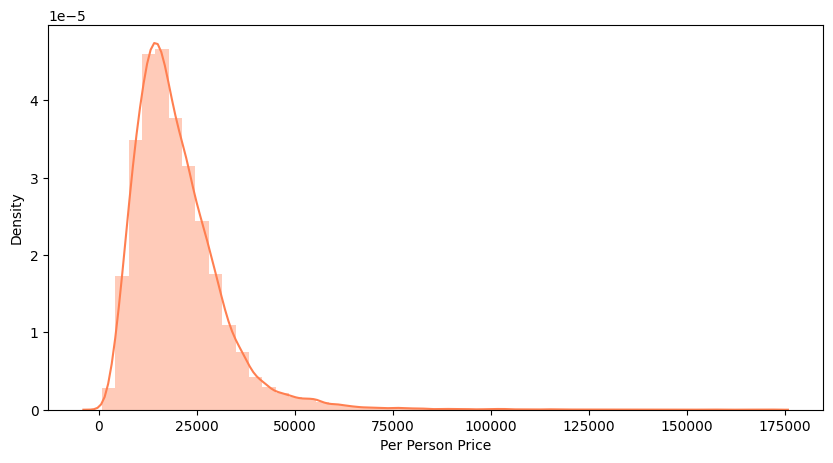

In [23]:
# Lets analyze the target variable

# Note - Genrally Price,Revenue, Profits ..... etc are +vely skewed.....

plt.figure(figsize=[10,5])
sns.distplot(combined['Per Person Price'],color = 'coral')
plt.show()

In [24]:
combined['Per Person Price'].describe()

count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64

In [25]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_Sightseeing
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7


In [26]:
# Flights  = Not Available

combined.loc[(combined['Airline'] == 'Not Available') & (combined['Flight Stops'] == 0) & (combined['Meals']==0)]

# As per the data, people have ordered meals irrespecitve of flight information.
# This suggest that all the customers in the data have opted for flights.
# Now we will find out the count of flights for each passenger.

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_Sightseeing


In [27]:
# Extracting the count of flights taken

combined['Airline'] = combined['Airline'].apply(and_)
combined['Count_Airline'] = combined.Airline.apply(lambda x:len(x.split("|")))

In [28]:
# Convert the Travel Date into DateTime 

combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])

In [29]:
# combined.info()

# Extracting Date,Month and Year

combined['Year'] = combined['Travel Date'].dt.year
combined['Month'] = combined['Travel Date'].dt.month
combined['Day'] = combined['Travel Date'].dt.day

In [30]:
# Identify Pattern between Month and Target Variable

sns.set_style("whitegrid")
max_month = combined.groupby("Month")['Per Person Price'].max()

In [31]:
max_month

Month
1     134981.0
2     125611.5
3     124621.0
4     159740.0
5     171062.5
6     101423.5
7     153795.0
8     112493.5
9     166758.0
10    170763.0
11    136155.5
12    115337.0
Name: Per Person Price, dtype: float64

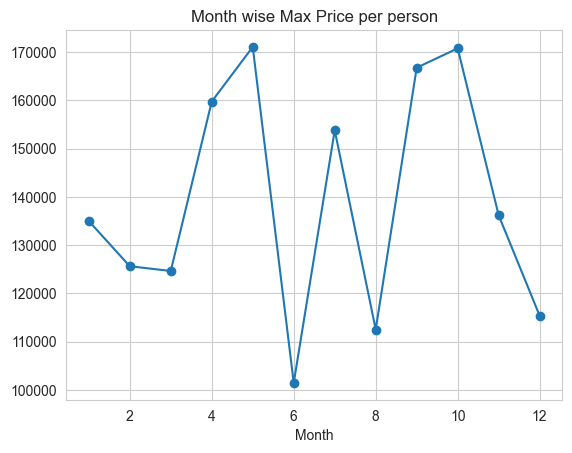

In [32]:
max_month.plot(kind='line',marker="o")
plt.title('Month wise Max Price per person')
plt.show()

In [33]:
# 4,5,7,9,10  - Peak Months

peak = [4,5,7,9,10]
def peaks(x):
    if x in peak:
        return('High_Paying_Months')
    else:
        return('Lean_Months')

In [34]:
combined['Month_Cat'] = combined['Month'].apply(peaks)

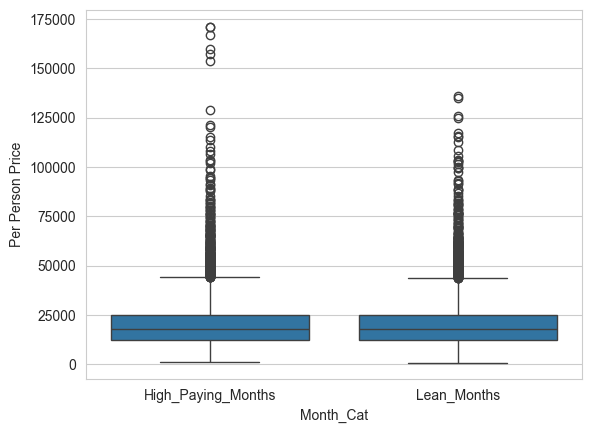

In [35]:
sns.boxplot(x='Month_Cat',y = 'Per Person Price',data = combined)
plt.show()

In [36]:
# Identify Pattern between Day and Target Variable
max_days = combined.groupby("Day")['Per Person Price'].max()

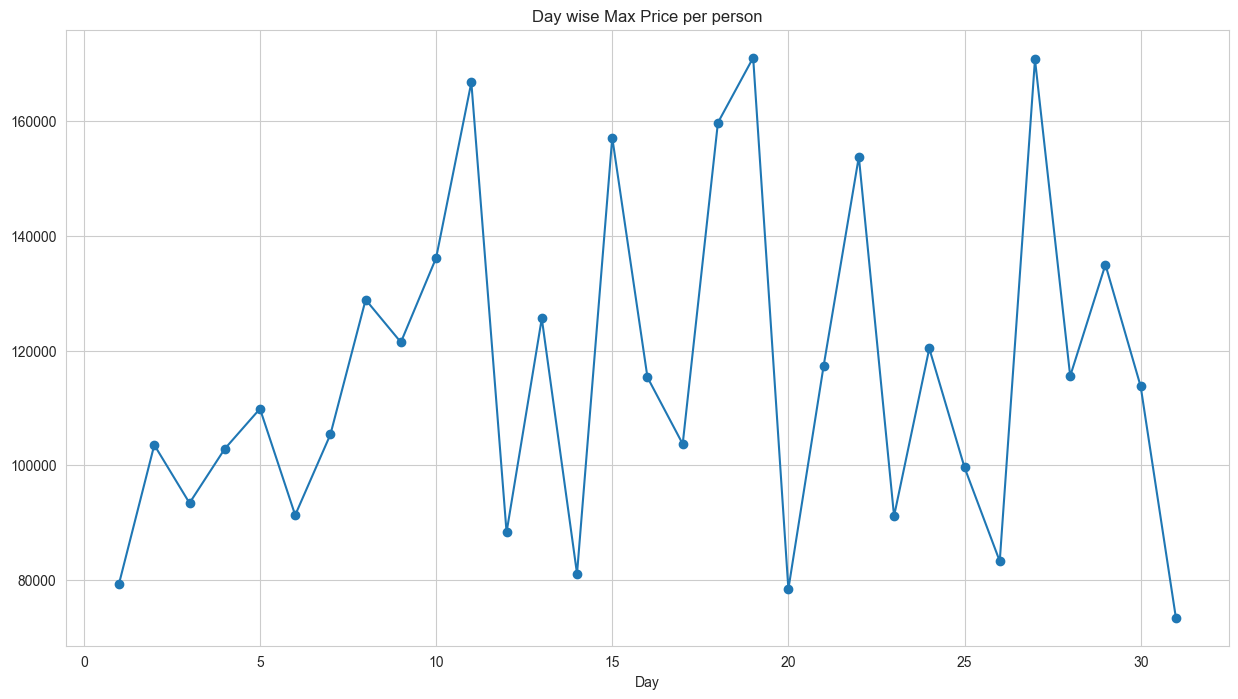

In [37]:
plt.figure(figsize=(15,8))
max_days.plot(kind='line',marker="o")
plt.title('Day wise Max Price per person')
plt.show()

In [38]:
# 5,8,10,11,13,15,18,19,22,24,27,29

peak_dates = [5,8,10,11,13,15,18,19,22,24,27,29]
def peaks(x):
    if x in peak_dates:
        return('High_Paying_Days')
    else:
        return('Lean_Days')

In [39]:
combined['Day_Cat'] = combined['Day'].apply(peaks)

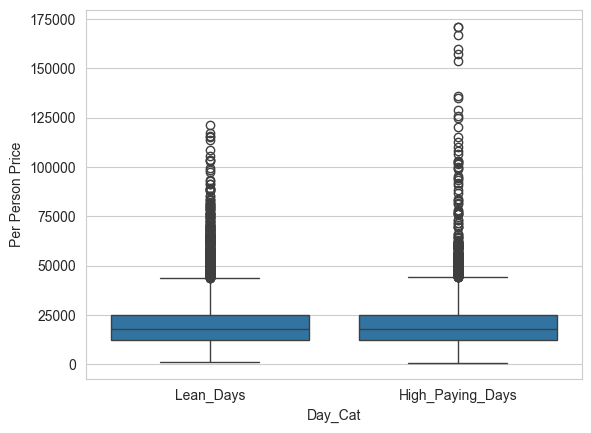

In [40]:
sns.boxplot(x='Day_Cat',y = 'Per Person Price',data = combined)
plt.show()

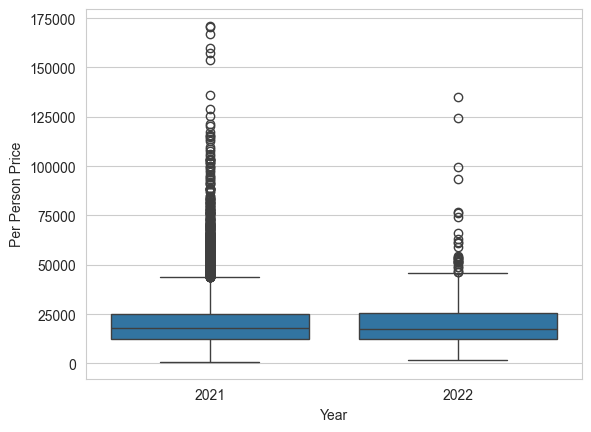

In [41]:
sns.boxplot(x='Year',y = 'Per Person Price',data = combined)
plt.show()

In [42]:
text = 'The Just Dial Contact Number is 0888888888 and their revenue for 2023-24 has been $100 Mils.'
print(re.findall("\d{10}",text))
print(re.findall("\d+",text)[-1])

['0888888888']
100


In [43]:
text = 'The Just Dial Contact Number is 0888888888 and their revenue for 2023-24 has been $100 Mils. However, the CEO number of Just Dial is (999)-233-4666.'
print(re.findall("\d{10}|\(\d{3}\)-\d+-\d+",text))

['0888888888', '(999)-233-4666']


In [44]:
combined['Itinerary'].unique()[0]

'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

In [45]:
# Regular Expression

# re.findall("\d{1}",combined['Itinerary'].unique()[0])
# pd.to_numeric(re.findall("\d{1}",combined['Itinerary'].unique()[0]))
np.sum(pd.to_numeric(re.findall("\d{1}",combined['Itinerary'].unique()[0])))

6

In [46]:
combined['Duration'] = combined.Itinerary.apply(lambda x:np.sum(pd.to_numeric(re.findall("\d{1}",x))))

In [47]:
combined['Hotel Details'].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'],
      dtype=object)

In [48]:
combined['Rating'] = combined['Hotel Details'].apply(lambda x:np.mean(pd.to_numeric(re.findall("\d\.\d",x))))

In [49]:
combined.loc[combined['Rating'].isnull(),"Hotel Details"].unique()

array(['Not Available',
       'The Himalayan Village:Four|The Holiday Resorts, Cottages & Spa:Four',
       'UDAY SAMUDRA LEISURE BEACH HOTEL & SPA-MMT Holidays Special:4|Hotel Sivamurugan:',
       ..., 'Mayfair Hotel:Four|The Elgin Nor-Khill Hotel:Five',
       'Tea Village-MMT Holidays Special:4|Crown Valley-MMT Holidays Special:|Oxygen Resorts Alleppey-MMT Holidays Special:|Kshetra Ayurveda & Yoga Retreat, Varkala:|Over The Hill-MMT Holidays Special:',
       'The Oberoi Cecil:Five|Fernhill Resort:Three'], dtype=object)

In [50]:
combined['Rating'].fillna(combined['Rating'].mean(),inplace=True)

In [51]:
combined.isnull().sum()

Uniq Id                          0
Package Name                     0
Package Type                     0
Destination                      0
Itinerary                        0
Places Covered                   0
Travel Date                      0
Hotel Details                    0
Start City                       0
Airline                          0
Flight Stops                     0
Meals                            0
Sightseeing Places Covered       0
Cancellation Rules               0
Per Person Price              9000
Count_Destination                0
Count_Sightseeing                0
Count_Airline                    0
Year                             0
Month                            0
Day                              0
Month_Cat                        0
Day_Cat                          0
Duration                         0
Rating                           0
dtype: int64

In [52]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_Sightseeing,Count_Airline,Year,Month,Day,Month_Cat,Day_Cat,Duration,Rating
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,2021,7,30,High_Paying_Months,Lean_Days,6,4.106857
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,2021,12,8,Lean_Months,High_Paying_Days,4,4.433333
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8,1,2021,4,26,High_Paying_Months,Lean_Days,3,4.400000
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam|Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,5,9,1,2021,8,27,Lean_Months,High_Paying_Days,6,4.500000
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2,2021,12,12,Lean_Months,Lean_Days,7,4.350000


In [53]:
subset = combined.drop(['Uniq Id','Destination','Itinerary','Places Covered','Travel Date','Hotel Details','Airline','Sightseeing Places Covered','Cancellation Rules'],axis=1)

In [54]:
subset.head()

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_Destination,Count_Sightseeing,Count_Airline,Year,Month,Day,Month_Cat,Day_Cat,Duration,Rating
0,Best of Shimla and Manali Holiday from Delhi,Standard,Mumbai,2,3,11509.0,4,1,1,2021,7,30,High_Paying_Months,Lean_Days,6,4.106857
1,Kashmir Valley vacation,Premium,New Delhi,0,5,22485.5,3,7,2,2021,12,8,Lean_Months,High_Paying_Days,4,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,New Delhi,0,4,12421.5,2,8,1,2021,4,26,High_Paying_Months,Lean_Days,3,4.400000
3,Colorful Kerala ( Romantic Getaway ),Premium,New Delhi,0,5,35967.0,5,9,1,2021,8,27,Lean_Months,High_Paying_Days,6,4.500000
4,A Week In Bangkok & Pattaya,Premium,New Delhi,0,5,25584.0,2,2,2,2021,12,12,Lean_Months,Lean_Days,7,4.350000


In [55]:
# Package

subset['Package Type'].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

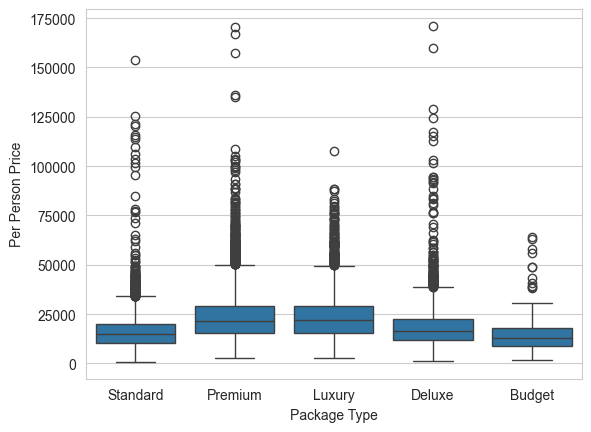

In [56]:
sns.boxplot(x='Package Type',y = 'Per Person Price',data = subset)
plt.show()

In [57]:
# Encoding on Package .....

combined.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [58]:
mapped = {'Deluxe' : 5, "Premium": 4, "Standard" : 3, "Luxury" : 2 , "Budget" : 1}
subset['Package Type'] = subset['Package Type'].map(mapped)

In [59]:
# Package v/s Holiday (Duration)

subset.groupby('Package Type')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
1,682.0,3.478006,1.272186,1.0,3.0,3.0,4.0,7.0
2,4688.0,4.663183,1.792593,1.0,3.0,5.0,6.0,12.0
3,8171.0,4.759148,1.806489,1.0,3.0,5.0,6.0,14.0
4,7960.0,4.765829,1.821384,1.0,3.0,5.0,6.0,14.0
5,8499.0,4.777974,1.749896,1.0,3.0,5.0,6.0,12.0


In [60]:
subset['Count_Pkg_Holidays'] = subset.groupby("Package Type")['Duration'].transform('count')

In [61]:
# Package Name .....

subset.groupby('Package Name')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Name,,,,,,,,
02 Night Singapore and 02 Night Genting Dream Cruise,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
2 Nights Dubai and 2 Nights Sharjah Holiday,16.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights Moscow & 2 Nights Saint Petersburg,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights each in Jodhpur & Jaisalmer,14.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
2 Nights in Munnar with Thekkady and Cochin,15.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
Young and Free - Party Trip to Goa from Mumbai (By Bus),3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Young and Free - Party Trip to Goa from Pune (By Bus),5.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Young and Free - Udaipur Weekend from Ahmedabad (By Bus),2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [62]:
subset['Count_Pkg_Name_Holidays'] = subset.groupby("Package Name")['Duration'].transform('count')

In [63]:
subset.columns

Index(['Package Name', 'Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Per Person Price', 'Count_Destination', 'Count_Sightseeing',
       'Count_Airline', 'Year', 'Month', 'Day', 'Month_Cat', 'Day_Cat',
       'Duration', 'Rating', 'Count_Pkg_Holidays', 'Count_Pkg_Name_Holidays'],
      dtype='object')

In [65]:
# dropping additional columns from subset

# new = subset.drop(['Package Name','Start City','Month', 'Date'],axis=1)
new = subset.drop(['Package Name','Start City','Month'],axis=1)

In [66]:
# Lets split data in train and test

newtrain = new.loc[0:train.shape[0]-1, ]
newtest = new.loc[train.shape[0]:, ]

newtrain.shape,newtest.shape,train.shape,test.shape

((21000, 15), (9000, 15), (21000, 15), (9000, 14))

In [67]:
# Dropping the target variable from the testsets

newtest.drop('Per Person Price',axis=1,inplace=True)

In [68]:
newtrain.shape,newtest.shape,train.shape,test.shape

((21000, 15), (9000, 14), (21000, 15), (9000, 14))

In [69]:
# Encoding the Categrical Variables

dummytrain = pd.get_dummies(newtrain,drop_first=True,dtype='int')
dummytest = pd.get_dummies(newtest,drop_first=True,dtype='int')

## Modeling

In [70]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

X = dummytrain.drop('Per Person Price',axis=1)
Y = dummytrain['Per Person Price']

rf = RandomForestRegressor()
pred_rf = rf.fit(X,Y).predict(dummytest)

In [71]:
gbm = GradientBoostingRegressor()
gbm_pred = gbm.fit(X,Y).predict(dummytest)

## Submission File 

In [72]:
rf_model = pd.DataFrame({'Per Person Price': pred_rf})
rf_model.to_csv('pred_rf.csv',index=False)

In [73]:
gbm_model = pd.DataFrame({'Per Person Price': gbm_pred})
gbm_model.to_csv('pred_gbm.csv',index=False)